In [5]:
from helper_loader import *

In [6]:
def compute_normal_euler(
    settings: VolumeSettings, normal: Optional[np.ndarray] = None
) -> np.ndarray:

    pitch = math.radians(settings.pitch)
    yaw = math.radians(settings.yaw)

    match settings.orientation:
        case Orientation.CORONAL:
            normal = normal or [-1, 0, 0]
            rotation = Rotation.from_euler("ZY", [pitch, yaw])
        case Orientation.HORIZONTAL:
            normal = [0, 1, 0]
            rotation = Rotation.from_euler("ZX", [pitch, yaw])
        case Orientation.SAGITTAL:
            normal = [0, 0, 1]
            rotation = Rotation.from_euler("XY", [pitch, yaw])

    return rotation.apply(normal)

In [7]:
volume_shape = load_volume(get_atlas_path(Resolution.MICRONS_25)).shape
update_cameras(volume_shape)
update_axes(volume_shape)

array = np.zeros(shape=volume_shape, dtype=np.uint16)
array[:, :, (volume_shape[2] - 1) // 2] = 2**16 - 1

# draw_array_skeleton(array)

volume = vedo.Volume(array)

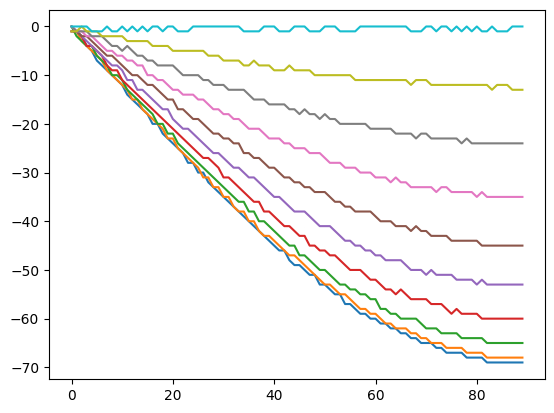

In [8]:
yaw_offsets = []

for pitch in range(0, 91, 10):
    current_yaw_offsets = []
    for yaw in range(90):
        settings = VolumeSettings(
            orientation=Orientation.CORONAL,
            resolution=Resolution.MICRONS_25,
            offset=70,
            pitch=pitch,
            yaw=yaw,
            shape=volume_shape,
        )

        image = VolumeSlicer(volume=volume).slice(settings)

        yaw_index = np.argmax(image[image.shape[0] // 2])
        yaw_offset = yaw_index - ((image.shape[1] - 1) // 2)

        current_yaw_offsets.append(yaw_offset)

    yaw_offsets.append(current_yaw_offsets)

    plt.plot(current_yaw_offsets)

plt.show()

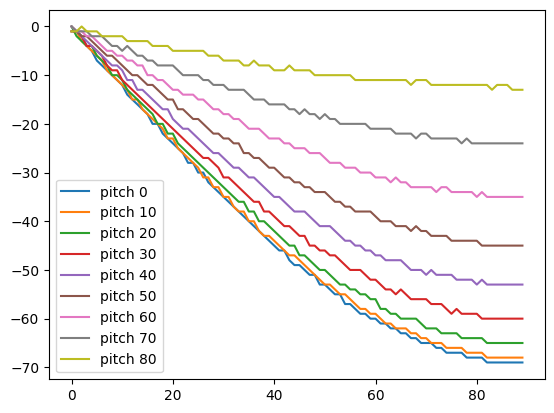

In [9]:
plt.plot(np.array(yaw_offsets[:-1]).T)
plt.legend([f"pitch {pitch}" for pitch in range(0, 91, 10)])

# y = x
# plt.plot([-i for i in range(90)])

#
# plt.plot([1.01 * (i - 90) ** 1.521 - 68.5 for i in range(90)])

plt.show()

In [10]:
settings = VolumeSettings(
    orientation=Orientation.SAGITTAL,
    resolution=Resolution.MICRONS_25,
    offset=70,
    pitch=0,
    yaw=35,
    shape=volume_shape,
)

imshow(
    VolumeSlicer(volume=volume).slice(settings, normal_function=compute_normal_euler)
)

TypeError: VolumeSlicer.slice() got an unexpected keyword argument 'normal_function'

In [ ]:
show(volume, camera=coronal_camera)

In [13]:
yaw_offsets[0][35]

-40